# Content
* Libraries & Contants
* Rastrigin Function
* Implementing Particle
* Implementing PSO Algorithm
* Combining all together
* PSO Visualization

## Libraries & Contants

In [1]:
from __future__ import division

import numpy
import pandas
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
from pso_utils import *
%matplotlib notebook

# Rastrigin Function

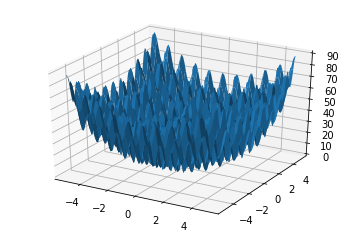

In [2]:
three_d_plot(*data_point_creator(-5.12, 5.12, rastrigin_func))

## Implementing Particle

In [3]:
class Particle:
    def __init__(self,x):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(*self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]

# Implementing PSO

In [4]:
class PSO():
    def __init__(self,costFunc,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(bounds)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group
        
        
        # establish the swarm
        self.swarms = []
        swarm=[]
        for i in range(num_particles):
            x = [bounds[0][0] + np.random.rand() * (bounds[0][1] - bounds[0][0])
                  for i in range(num_dimensions)]
            swarm.append(Particle(x))
        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            s = []
            for j in range(num_particles):
                swarm[j].evaluate(costFunc)
                 
                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
                s.append(swarm[j].position_i + [swarm[j].err_i])
            # cycle through swarm and update velocities and position
            self.swarms.append(s)
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            
        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (err_best_g)

## Combining All Together

In [11]:
def main():
    #--- EXECUTE

    bounds=[(-10,10),(-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]

    return PSO(rastrigin_func,bounds,num_particles=15,maxiter=30)
if __name__ == "__main__":
    pso = main()

FINAL:
[-0.5546147407414035, 0.47507538486882955]
0.0


## PSO Visualization

In [12]:
%matplotlib inline
three_d_plot(*data_point_creator(-10, 10, rastrigin_func), genetic_points=np.array(pso.swarms), elev=70)

In [13]:
two_d_plot(*data_point_creator(-10, 10, rastrigin_func), genetic_points=np.array(pso.swarms))

C:\Users\Erfan\Anaconda3\envs\tf\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  s)


# Graph

In [8]:
G = nx.Graph()
class E:
    pass

In [9]:
G.nodes
x=E()
y = E()
G.add_edge(x, y)

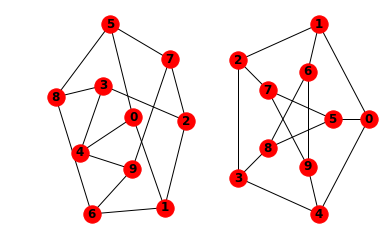

In [10]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')